In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt
import datetime
import csv
import math

In [2]:
def relative_velocity(filename):
    '''
    Reads a COMBINED data file and outputs an array of relative velocities
    '''
    data = pd.read_csv(filename)
    Wind_Dir = data['FS_WD'] # degrees
    Wind_Spd = data['FS_WS'] *(1609.34/3600) # conversion to m/s
    Act_Dir = data['bearing(deg)'] # degrees
    Act_Spd = data['speed(m/s)'] #m/s
    
    rad_wind = (Wind_Dir-180)*(np.pi/180) # subtract 180 b/c reported direction is where wind is coming FROM
    rad_act = (Act_Dir)*(np.pi/180) # direction of activity
    u1 = Wind_Spd*np.sin(rad_wind)
    v1 = Wind_Spd*np.cos(rad_wind)
    u2 = Act_Spd*np.sin(rad_act)
    v2 = Act_Spd*np.cos(rad_act)
    vect1 = np.sqrt(u1**2+u2**2)
    vect2 = np.sqrt(v1**2+v2**2)
    alpha = []
    for i in range(0,len(Wind_Spd)):
        angle = np.arccos(((u1[i]*v1[i])+(u2[i]*v2[i])) / (vect1[i]*vect2[i]))
        alpha = np.append(angle,alpha)
    alpha = alpha[::-1]
    v_r = np.sqrt(Wind_Spd**2+Act_Spd**2 - (2*Wind_Spd*Act_Spd*np.cos(np.pi+alpha)))
    return v_r,u1,v1,u2,v2

In [3]:
v_r,u1,v1,u2,v2 = relative_velocity('Mar30.csv')

In [4]:
v_r.describe()

count    859.000000
mean      11.979547
std        2.550095
min        5.722589
25%       10.239361
50%       12.255552
75%       13.772977
max       17.775685
dtype: float64

In [5]:
Mar30 = pd.read_csv('Mar30.csv')

In [6]:
lat_deg = Mar30['lat(DD)']
lon_deg = Mar30['lon(DD)']

In [7]:
from coordinateSystems import GeographicSystem
alt = np.zeros_like(np.array(lat_deg))

In [8]:
geo = GeographicSystem() 
X, Y, Z = geo.toECEF(np.array(lon_deg), np.array(lat_deg), alt) # Use degrees
stack = np.vstack((X,Y,Z))

In [9]:
lat0, lon0 = (33.5783465, -101.8954462) # centered at the Fixed Site
from coordinateSystems import TangentPlaneCartesianSystem

tangent = TangentPlaneCartesianSystem(ctrLat=lat0,ctrLon=lon0,ctrAlt=978)
local = (tangent.toLocal(stack))

In [10]:
local2 = local[:,:].T # The local coords transposed

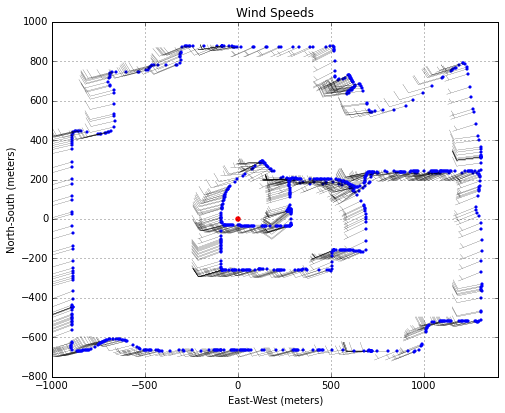

In [11]:
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(211)
ax.set_xlim(-1000,1400)

ax.scatter(0,0,c='r',s=30,linewidths=0)
for i in range(0,len(lat_deg)):
    ax.scatter(local2[i,:2][0],local2[i,:2][1],s=10,linewidths=0)
    ax.barbs(local2[i,:2][0],local2[i,:2][1],u1[i],v1[i],linewidth=0.1)
    #ax.quiver(local2[i,:2][0],local2[i,:2][1],u[i],v[i],linewidth=0,width=0.001,headwidth=15)
ax.set_title('Wind Speeds')
ax.set_xlabel('East-West (meters)')
ax.set_ylabel('North-South (meters)')
ax.grid()

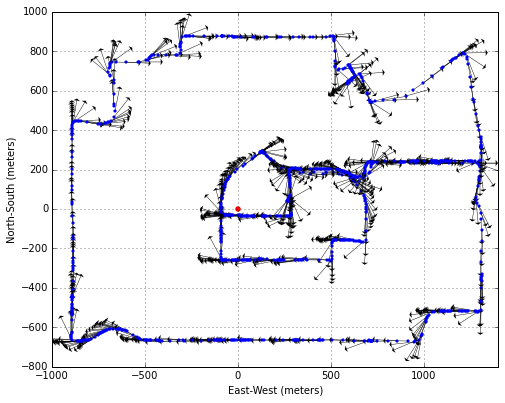

In [14]:
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(211)
ax.set_xlim(-1000,1400)

ax.scatter(0,0,c='r',s=30,linewidths=0)
for i in range(0,len(lat_deg)):
    ax.scatter(local2[i,:2][0],local2[i,:2][1],s=10,linewidths=0)
    #ax.barbs(local2[i,:2][0],local2[i,:2][1],u1[i],v1[i],linewidth=0.1)
    ax.quiver(local2[i,:2][0],local2[i,:2][1],u2[i],v2[i],linewidth=0,width=0.001,headwidth=15)
#ax.set_title('Activity Speeds')
ax.set_xlabel('East-West (meters)')
ax.set_ylabel('North-South (meters)')
ax.grid()
plt.savefig('Vr_vectors.png', format='png', dpi=300)

In [13]:
print v_r.describe()

count    859.000000
mean      11.979547
std        2.550095
min        5.722589
25%       10.239361
50%       12.255552
75%       13.772977
max       17.775685
dtype: float64


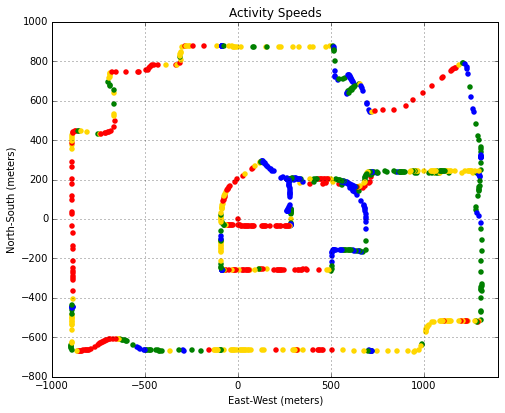

In [55]:
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(211)
ax.set_xlim(-1000,1400)

ax.scatter(0,0,c='r',s=30,linewidths=0)
for i in range(0,len(lat_deg)):
    if (v_r[i] < 10.23):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='b',linewidths=0,)
    elif (v_r[i] >= 10.23) & (v_r[i] <= 12.25):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='green',linewidths=0,)
    elif (v_r[i] >= 12.25) & (v_r[i] <= 13.77):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='gold',linewidths=0,)
    elif (v_r[i] > 13.77):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='r',linewidths=0,)
    else:
        pass
        
ax.set_title('Activity Speeds')
ax.set_xlabel('East-West (meters)')
ax.set_ylabel('North-South (meters)')
ax.grid()

In [57]:
CO = Mar30['SCK2_CO']

In [62]:
CO.describe()

count     859.000000
mean      622.807474
std       192.862698
min       276.860000
25%       523.990000
50%       562.790000
75%       651.410000
max      1620.540000
dtype: float64

In [66]:
from scipy import stats

In [68]:
stats.describe(CO) #count, min/max, variance, skewness, kurtosis

(859,
 (276.86000000000001, 1620.54),
 622.807473806752,
 37196.020425195995,
 2.959093245796146,
 12.097701221280925)

In [78]:
CO.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count     859.000000
mean      622.807474
std       192.862698
min       276.860000
10%       492.390000
20%       509.670000
30%       531.590000
40%       546.480000
50%       562.790000
60%       607.180000
70%       634.880000
80%       693.660000
90%       807.470000
max      1620.540000
dtype: float64

In [79]:
statistics = CO.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [85]:
statistics[3]

276.86000000000001

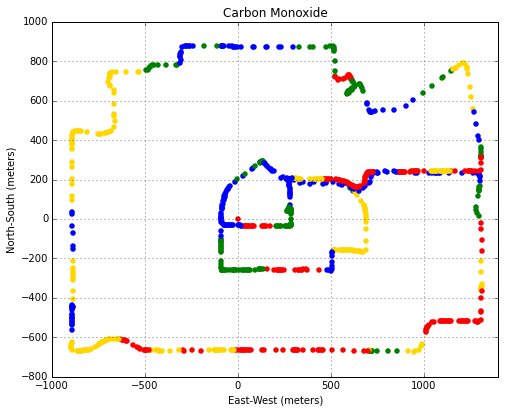

In [59]:
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(211)
ax.set_xlim(-1000,1400)

ax.scatter(0,0,c='r',s=30,linewidths=0)
for i in range(0,len(lat_deg)):
    if (CO[i] < 524):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='b',linewidths=0,)
    elif (CO[i] >= 524) & (CO[i] <= 562):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='green',linewidths=0,)
    elif (CO[i] >= 562) & (CO[i] <= 651):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='gold',linewidths=0,)
    elif (CO[i] > 651):
        ax.scatter(local2[i,:2][0],local2[i,:2][1],s=30,c='r',linewidths=0,)
    else:
        pass
        
ax.set_title('Carbon Monoxide')
ax.set_xlabel('East-West (meters)')
ax.set_ylabel('North-South (meters)')
ax.grid()